# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('cluster.csv')
X = dataset.iloc[ : , : ]

In [3]:
X  (# extra row for showing the tittle is added to csv file. python considers the first row as tittle)

,Feature1,Feature2,Feature3
0,-0.062737,1.150600,-0.263880
1,0.009840,1.109400,0.026539
2,0.634140,1.198600,0.130720
3,-0.025846,1.009500,0.065832
4,-0.076149,-0.100250,0.154570
...,...,...,...
295,0.509670,0.481360,0.334450
296,1.124400,0.076308,-0.064102
297,0.991030,0.086857,0.086681
298,0.650850,0.689700,0.298930


## Using the elbow method to find the optimal number of clusters

C:\Users\Sara121\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


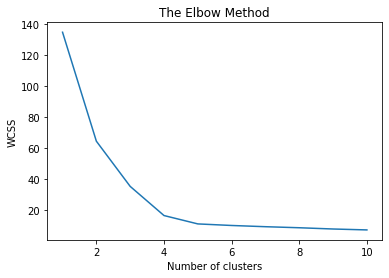

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11) :
    kmeans = KMeans(n_clusters = i , init = 'k-means++' , random_state= 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
!pip install autoelbow
from autoelbow_rupakbob import autoelbow
n =autoelbow.auto_elbow_search(X)
print(f"the optimal cluster number is {n} ")

C:\Users\Sara121\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


the optimal cluster number is 4 


## Training the K-Means model on the dataset

In [6]:
kmeans = KMeans(n_clusters = 4 , init = 'k-means++' , random_state= 42)
y_kmeans = kmeans.fit_predict(X)

In [7]:
print(y_kmeans)

[1 1 1 1 0 2 1 1 2 1 2 3 3 2 0 2 1 1 1 1 0 0 0 1 1 2 1 3 1 1 2 0 2 1 1 2 1
 0 1 1 3 1 1 1 1 3 1 3 1 2 3 1 2 2 1 3 3 3 1 2 0 1 3 2 0 0 0 2 2 3 1 3 0 3
 2 1 2 3 0 2 2 2 1 1 1 2 3 1 0 2 1 1 2 1 1 0 2 1 0 1 0 1 0 0 1 1 1 1 1 0 0
 1 2 0 1 1 1 1 1 0 3 3 0 1 2 2 3 1 1 3 0 0 1 3 3 1 2 1 1 1 3 1 3 2 1 0 1 1
 2 1 3 1 2 2 0 0 2 1 1 3 1 2 1 1 2 3 1 1 1 2 3 2 1 1 1 0 3 3 0 1 1 0 2 1 1
 2 0 0 1 0 3 3 3 2 3 2 2 1 1 2 3 2 1 0 2 2 3 1 2 3 2 2 1 2 1 0 2 1 2 1 1 3
 2 0 1 3 1 3 2 2 1 1 1 1 0 1 2 1 3 1 0 2 1 1 1 1 1 1 3 2 0 1 1 1 1 3 0 0 2
 2 2 0 3 2 0 0 0 1 3 1 0 1 3 2 1 3 3 2 2 1 1 1 2 1 1 0 2 1 2 1 0 1 2 2 2 3
 2 2 3 2]


## Visualising the clusters

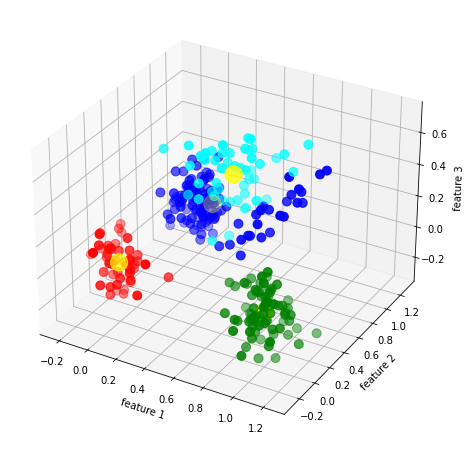

In [8]:
X = np.array(X)
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 80, c = 'red', label = 'Cluster 1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 80, c = 'blue', label = 'Cluster 2')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 80, c = 'green', label = 'Cluster 3')
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s = 80, c = 'cyan', label = 'Cluster 4')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],kmeans.cluster_centers_[:, 2], s = 300, c = 'yellow', label = 'Centroids')
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3')
plt.show()

## Visualising the clusters in 2D (according 2 feature)

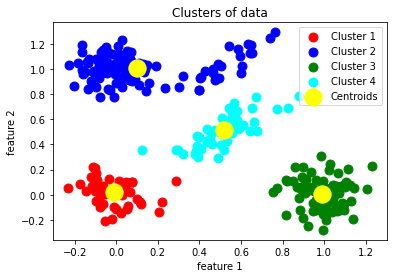

In [9]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 80, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 80, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 80, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of data')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()